In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import random

In [2]:
def show_img_cv(img_title, img):
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
def display_hist_plt(img, bins=256, range=(0, 256)):
    plt.figure(figsize=(4, 2), dpi=100)
    plt.hist(img.flat, bins=bins, range=range)
    plt.show()

In [5]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

## CLAHE

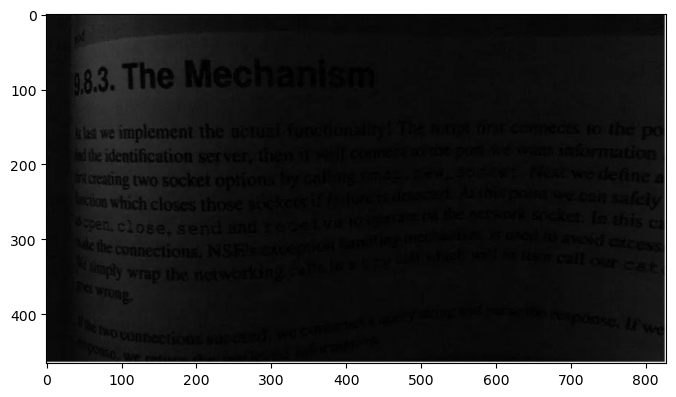

In [6]:
low_contrast_img = cv2.imread(r'img/c.jpg', 0)
show_img_plt(low_contrast_img)

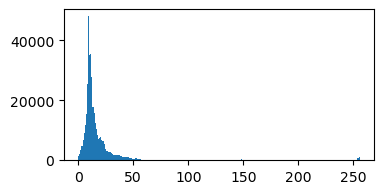

In [7]:
display_hist_plt(low_contrast_img)

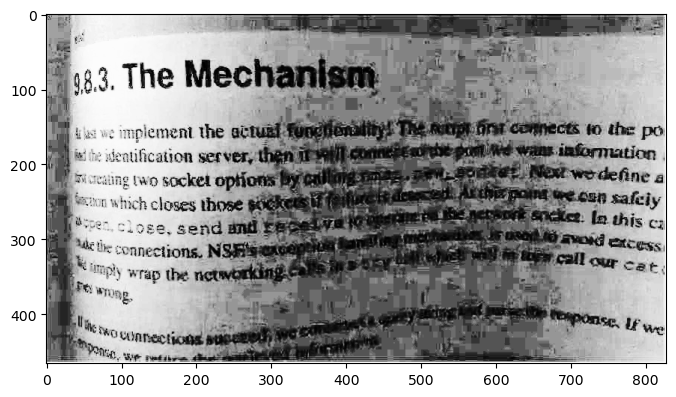

In [8]:
he_img = cv2.equalizeHist(low_contrast_img)
show_img_plt(he_img)

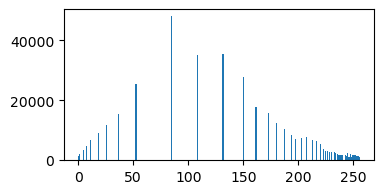

In [9]:
display_hist_plt(he_img)

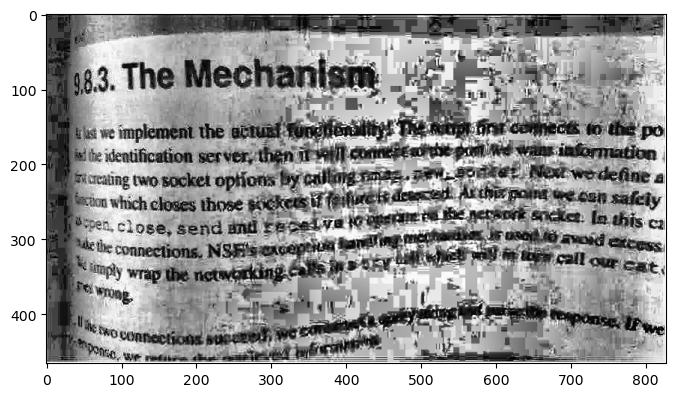

In [10]:
clahe = cv2.createCLAHE(clipLimit=100)
clahe_img = clahe.apply(low_contrast_img)
show_img_plt(clahe_img)

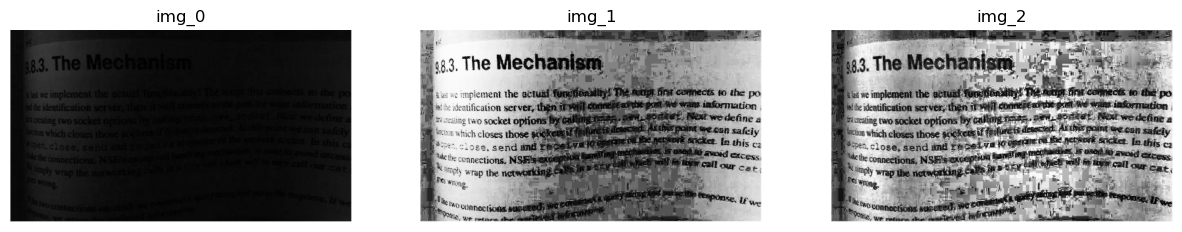

In [11]:
show_mult_img(1, 3, (low_contrast_img, he_img, clahe_img))

## Morphological Ops. 

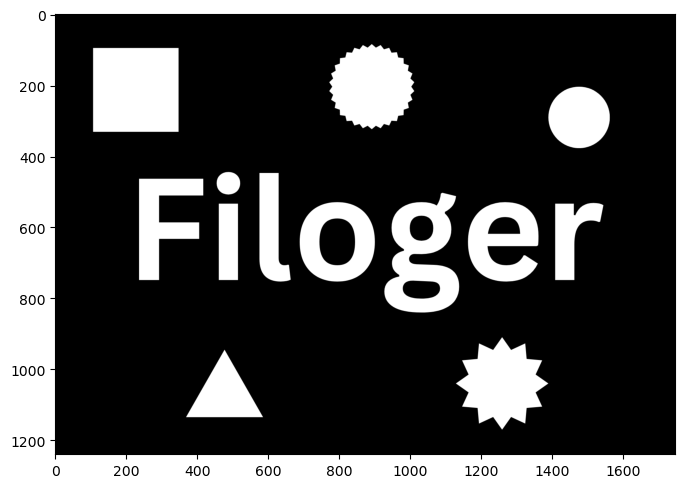

In [12]:
filoger_img = cv2.imread(r'img/filoger.png', 0)
show_img_plt(filoger_img)

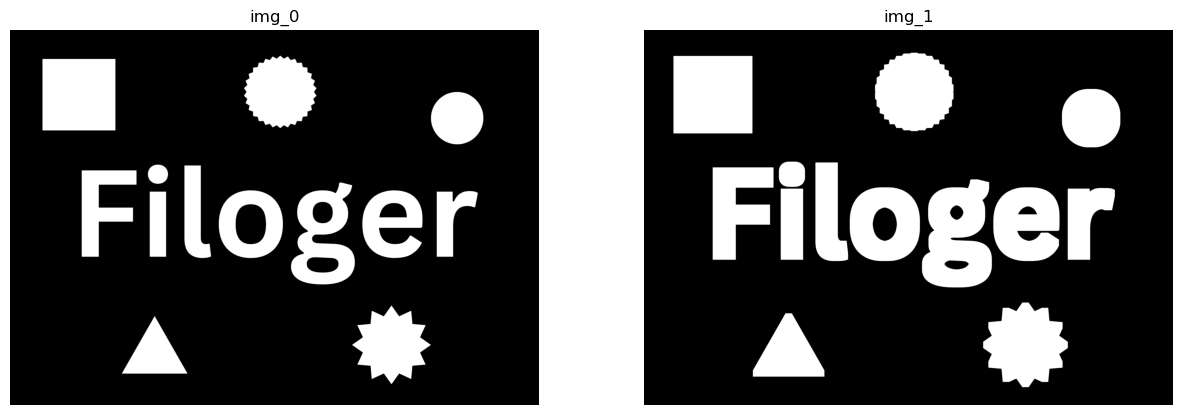

In [13]:
kernel = np.ones((5, 5), np.uint8)
dilated_img = cv2.dilate(filoger_img, kernel, iterations=5)
show_mult_img(1, 2, (filoger_img, dilated_img))

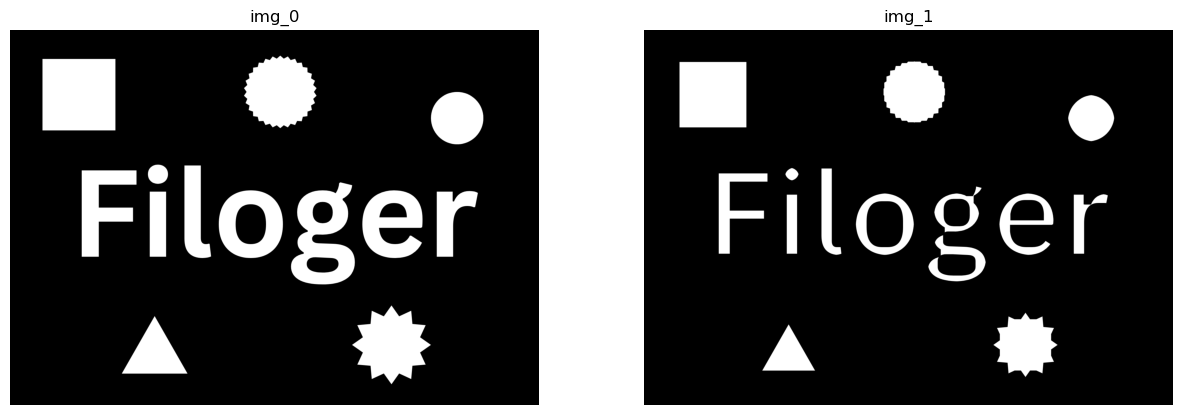

In [14]:
eroded_img = cv2.erode(filoger_img, kernel, iterations=5)
show_mult_img(1, 2, (filoger_img, eroded_img))

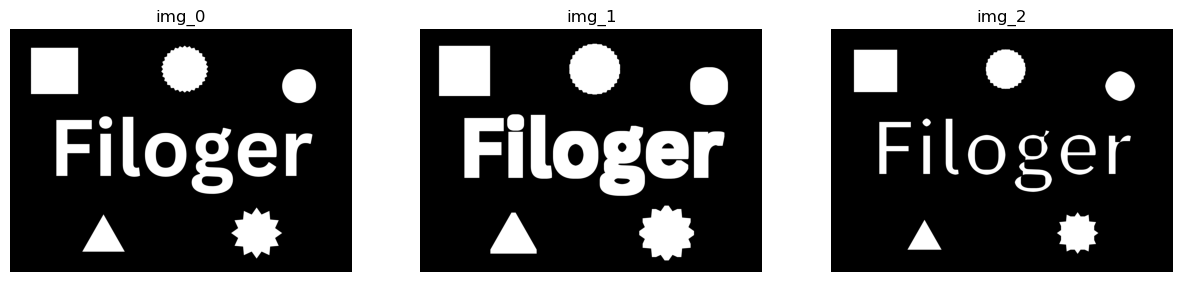

In [15]:
show_mult_img(1, 3, (filoger_img, dilated_img, eroded_img))

# Denoising

In [16]:
#Load images
image = cv2.imread(r'img/color_1.jpg', cv2.IMREAD_UNCHANGED)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

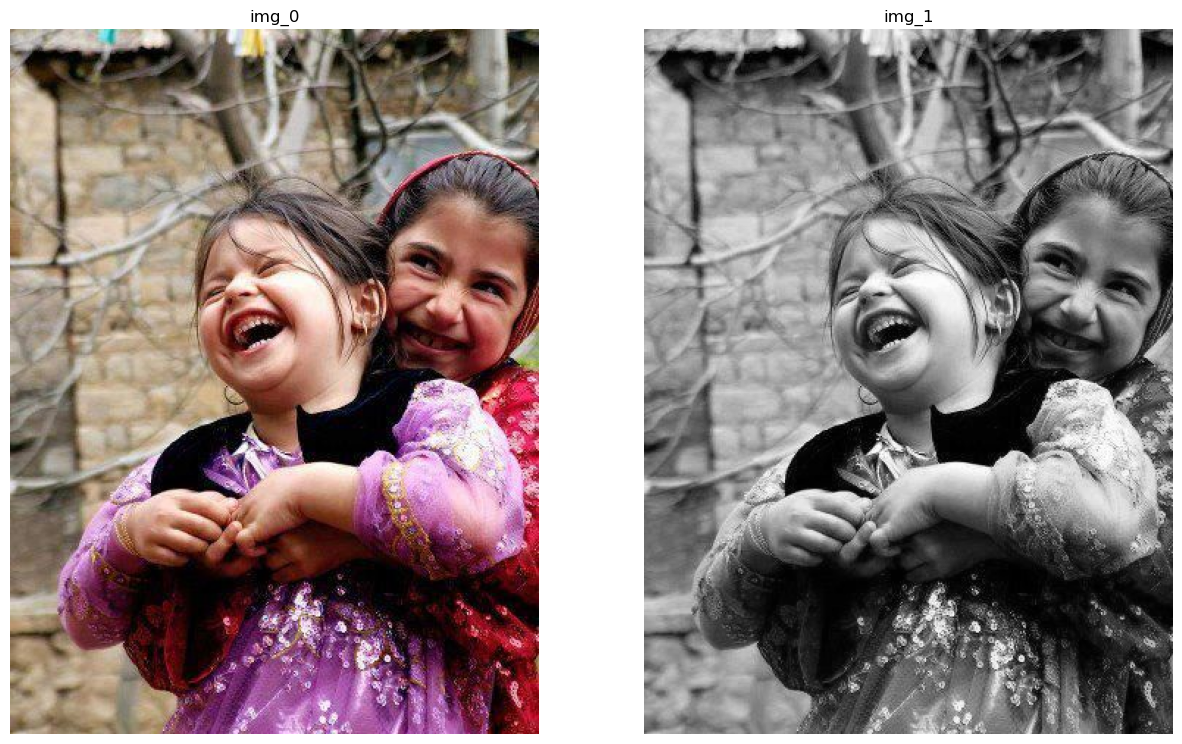

In [17]:
show_mult_img(1, 2, (image_color, image_gray))

In [22]:
#add gaussian noise!
def add_gaussian_noise(img, mean=0, variance=100):
    image = img.copy()
    gaussian = np.zeros(image.shape, np.uint8)
    cv2.randn(gaussian, mean, variance)
    return cv2.add(image, gaussian)
    

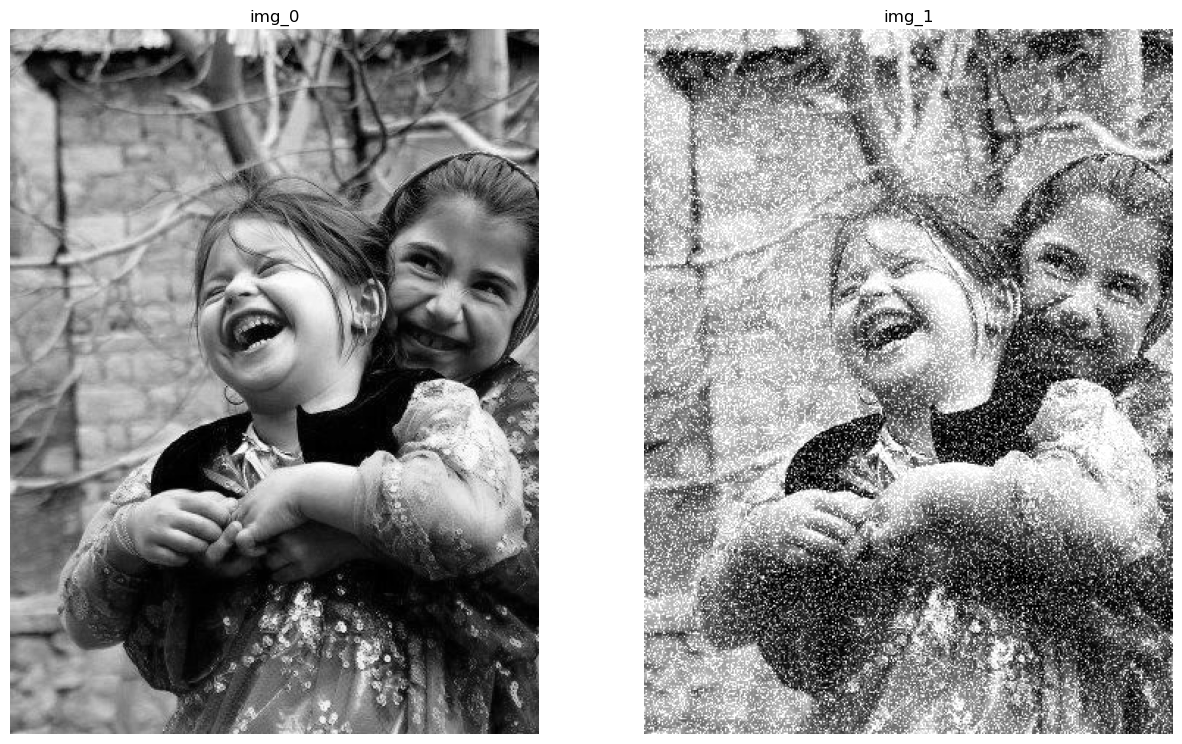

In [23]:
gaus_noise_gray_img = add_gaussian_noise(image_gray)
show_mult_img(1, 2, (image_gray, gaus_noise_gray_img))

In [24]:
#add salt and pepper
def add_salt_pepper_noise(img, threshold):
    image = img.copy()
    numPixels = image.shape[0]*image.shape[1]
    numNoise = numPixels*threshold
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            randNum = random.randint(0, numPixels)
            
            if randNum < numNoise:
                image[i, j] = random.randint(0, 1)*255
    return image        

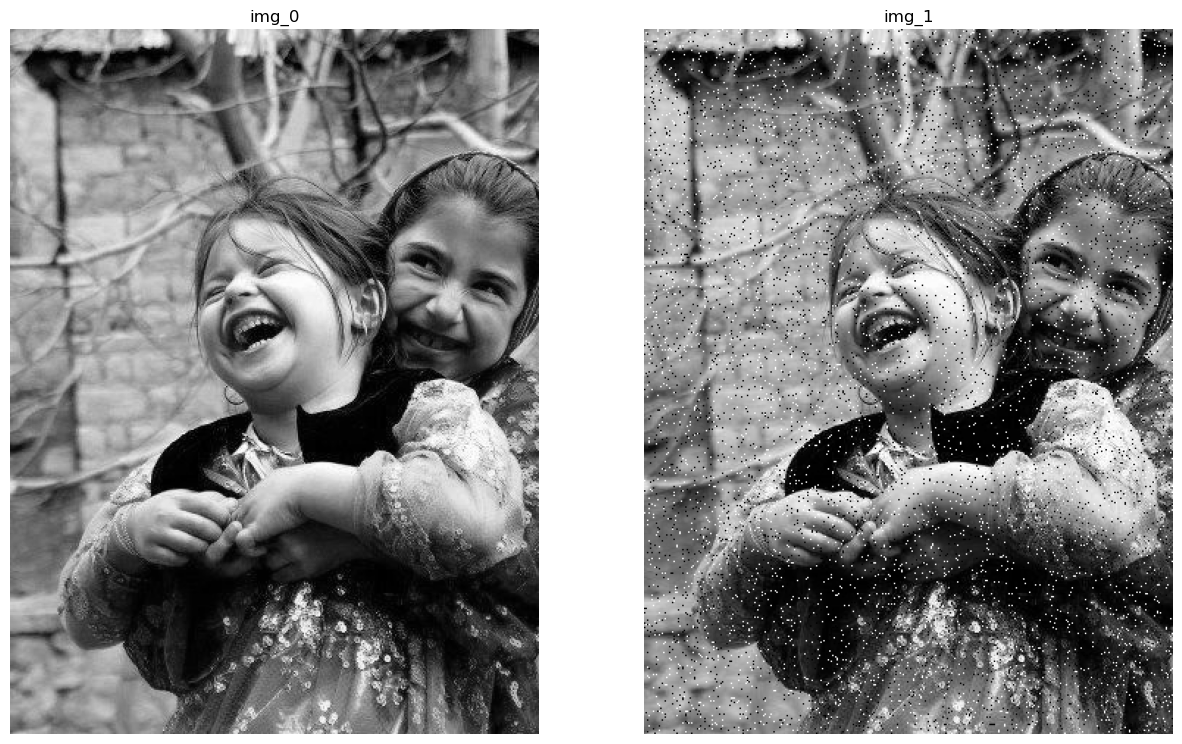

In [25]:
salt_pepper_noise_gray_img = add_salt_pepper_noise(image_gray, 0.05)
show_mult_img(1, 2, (image_gray, salt_pepper_noise_gray_img))

In [26]:
def add_impulse_noise(img, n):
    image = img.copy()
    out = np.random.randint(-n, n, (image.shape[0] , image.shape[1]))
    image = np.clip(image + out, 0, 255) #250 + 30 ---> 255
    return image

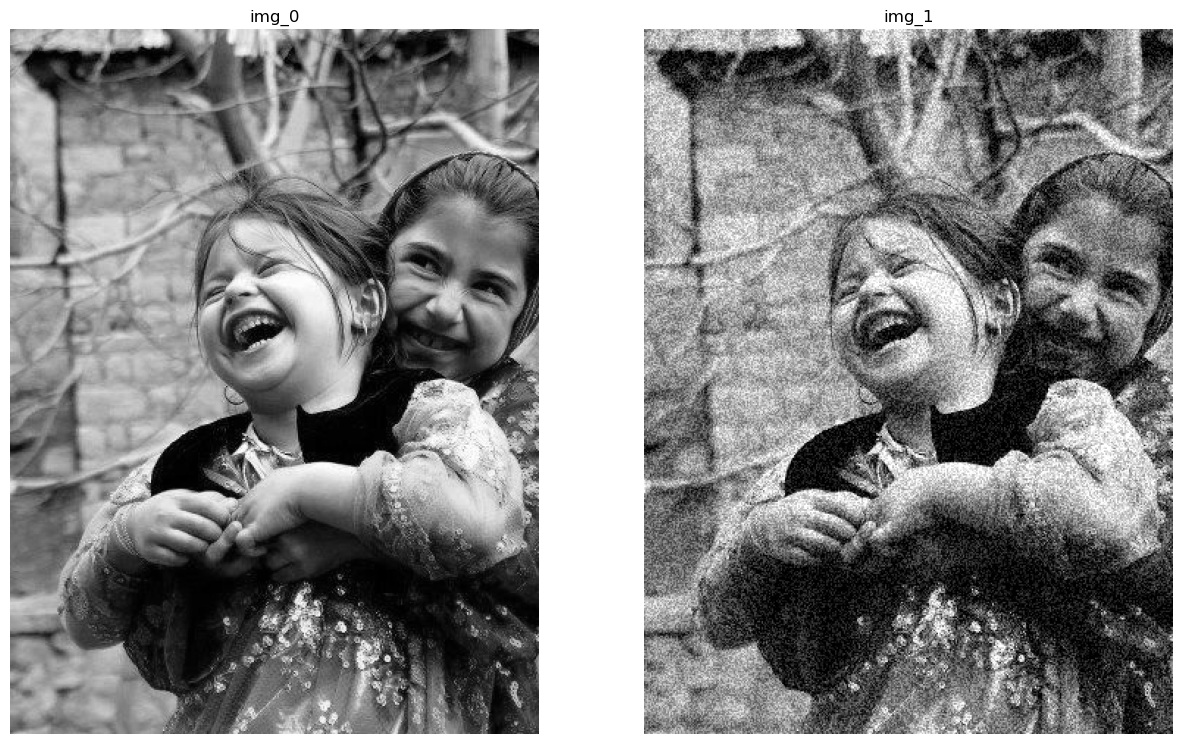

In [27]:
impulse_noise_gray_img = add_impulse_noise(image_gray, 50)
show_mult_img(1, 2, (image_gray, impulse_noise_gray_img))